In [1]:
#pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('fivethirtyeight')
plt.rcParams['text.color'] = 'black'

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4019 | Rendimento mensal habitual de todos os trabalhos para pessoas de 14 anos ou mais de idade (dinheiro, produtos ou mercadorias) | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|


 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082 

 *PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.*

Importação das bases

In [2]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/feather/'

#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF','Capital', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle e chave ID
                        'VD4019', #Variáveis de interesse
                        'V1027', 'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #expansão
                    
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
                print(f'lendo PNAD{ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
                print(f'lendo PNAD{ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(f'lendo PNAD{ano} {tri}')
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)

lendo PNAD2019 4
lendo PNAD2020 1
lendo PNAD2020 2
lendo PNAD2020 3
lendo PNAD2020 4
lendo PNAD2021 1
lendo PNAD2021 2
lendo PNAD2021 3
lendo PNAD2021 4
lendo PNAD2022 1
lendo PNAD2022 2


Tratamento dos dados

In [3]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

pnadc_completa = pd.concat([pnad_2019_4, 
                            pnad_2020_1, 
                            pnad_2020_2, 
                            pnad_2020_3, 
                            pnad_2020_4, 
                            pnad_2021_1, 
                            pnad_2021_2, 
                            pnad_2021_3, 
                            pnad_2021_4, 
                            pnad_2022_1, 
                            pnad_2022_2])
#Converte variável para criar ID
pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', 0, 1)
#Converte variáveis para numéricas
pnadc_completa['UPA'] = pd.to_numeric(pnadc_completa['UPA'] , errors='coerce') 
pnadc_completa['V1008'] = pd.to_numeric(pnadc_completa['V1008'] , errors='coerce') 
pnadc_completa['V1014'] = pd.to_numeric(pnadc_completa['V1014'] , errors='coerce') 
pnadc_completa['V2007'] = pd.to_numeric(pnadc_completa['V2007'] , errors='coerce') 
pnadc_completa['V2008'] = pd.to_numeric(pnadc_completa['V2008'] , errors='coerce') 
pnadc_completa['V20081'] = pd.to_numeric(pnadc_completa['V20081'] , errors='coerce') 
pnadc_completa['V20082'] = pd.to_numeric(pnadc_completa['V20082'] , errors='coerce') 

#Cria chave ID e novo df
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UPA':pnadc_completa['UPA'],
    'UF':pnadc_completa['UF'],
    'Capital':pnadc_completa['Capital'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'] + 
        pnadc_completa['V1008'] + 
        pnadc_completa['V1014'] + 
        pnadc_completa['V2007'] +
        pnadc_completa['V2008'] +
        pnadc_completa['V20081'] +
        pnadc_completa['V20082'],
    #Exploradas
    'VD4019': pnadc_completa['VD4019'],
    #Expansão
    'V1027': pnadc_completa['V1027'],
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })

#Reverte alteração da coluna V2007 para os rótulos anteiores
pnadc_completa['V2007'] = pnadc_completa['V2007'].apply(lambda x: 'Homem' if x == 0 else 'Mulher')
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

### Descritivas

In [4]:
def weighted_average(df,data_col,weight_col,by_col):
    df['_data_times_weight'] = df[data_col]*df[weight_col]
    df['_weight_where_notnull'] = df[weight_col]*pd.notnull(df[data_col])
    g = df.groupby(by_col)
    result = g['_data_times_weight'].sum() / g['_weight_where_notnull'].sum()
    del df['_data_times_weight'], df['_weight_where_notnull']
    return result

Média

In [5]:
rendimento_medio_trimestre = pd.DataFrame({'Média':weighted_average(pnadc_completa, 'VD4019', 'V1028', 'ano_tri').round(2)})

In [6]:
rendimento_medio_trimestre

,Média
ano_tri,
2019Q4,2322.52
2020Q1,2380.95
2020Q2,2475.65
2020Q3,2522.78
2020Q4,2481.70
2021Q1,2519.25
2021Q2,2497.54
2021Q3,2459.46
2021Q4,2447.34


In [7]:
rendimento_medio_sexo = weighted_average(pnad_2022_2, 'VD4019', 'V1028', 'V2007').round(2)

<AxesSubplot:title={'center':'Rendimento médio por sexo'}, xlabel='V2007'>

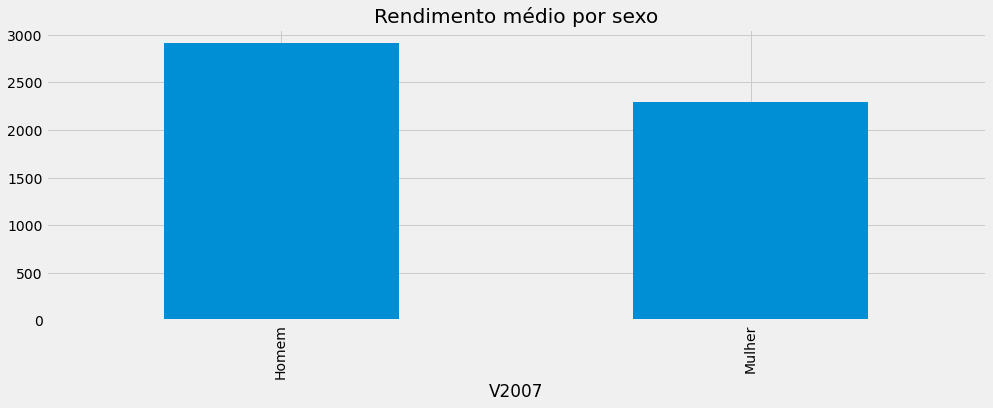

In [8]:
rendimento_medio_sexo.plot(kind='bar', figsize=(15,5), title='Rendimento médio por sexo')

In [9]:
rendimento_medio_estado = weighted_average(pnad_2022_2, 'VD4019', 'V1028', 'UF').round(2)

<AxesSubplot:title={'center':'Rendimento médio por estado'}, ylabel='UF'>

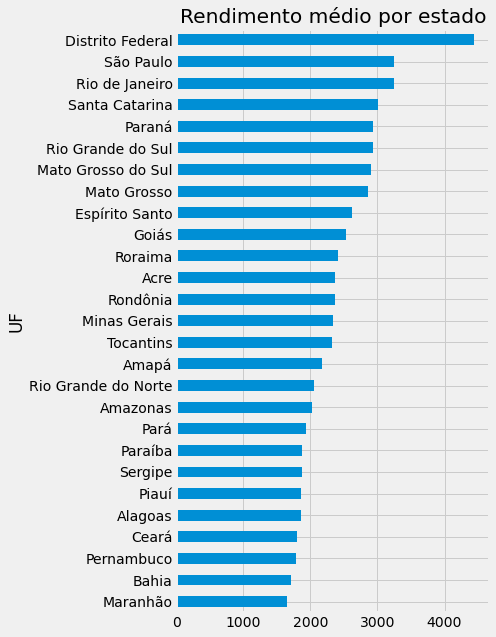

In [10]:
rendimento_medio_estado.sort_values().plot(kind='barh', figsize=(5,10), title='Rendimento médio por estado')

In [11]:
rendimento_medio_capital = weighted_average(pnad_2022_2, 'VD4019', 'V1028', 'Capital').round(2)

<AxesSubplot:title={'center':'Rendimento médio por capital'}, ylabel='Capital'>

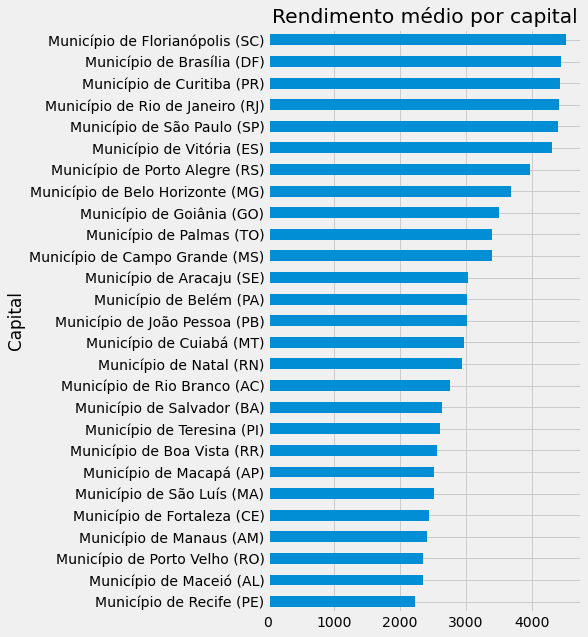

In [12]:
rendimento_medio_capital.sort_values().plot(kind='barh', figsize=(5,10), title='Rendimento médio por capital')

In [13]:
rendimento_medio_capital_sexo = pd.DataFrame({'Rendimento':weighted_average(pnad_2022_2, 'VD4019', 'V1028', ['Capital', 'V2007']).round(2)})

<AxesSubplot:ylabel='Capital'>

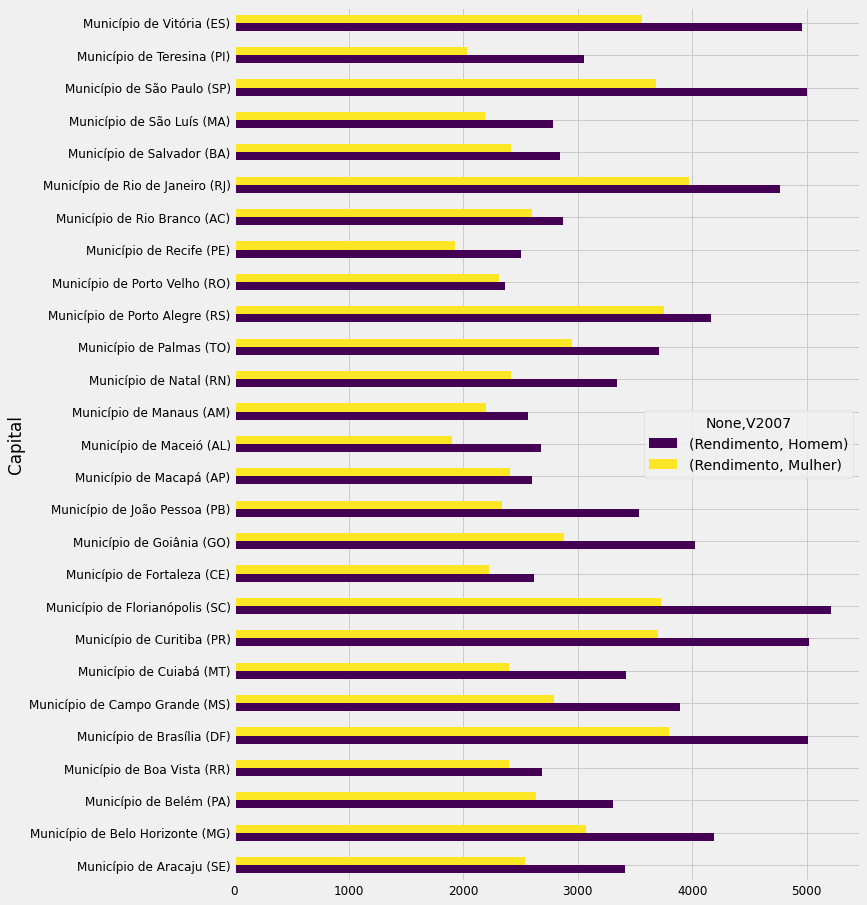

In [14]:
rendimento_medio_capital_sexo.unstack().plot(kind='barh',figsize=(10, 15), fontsize=12, colormap='viridis', linewidth=0)

Outras descritivas (sem conferência)

In [15]:
rendimento_mediano_trimestre = pd.DataFrame({'Mediana':pnadc_completa.groupby('ano_tri')['VD4019'].median()})

In [16]:
rendimento_mediano_trimestre

,Mediana
ano_tri,
2019Q4,1270.0
2020Q1,1300.0
2020Q2,1400.0
2020Q3,1400.0
2020Q4,1400.0
2021Q1,1400.0
2021Q2,1400.0
2021Q3,1400.0
2021Q4,1400.0


<AxesSubplot:title={'center':'Rendimento mediano e médio trimestral'}, xlabel='ano_tri'>

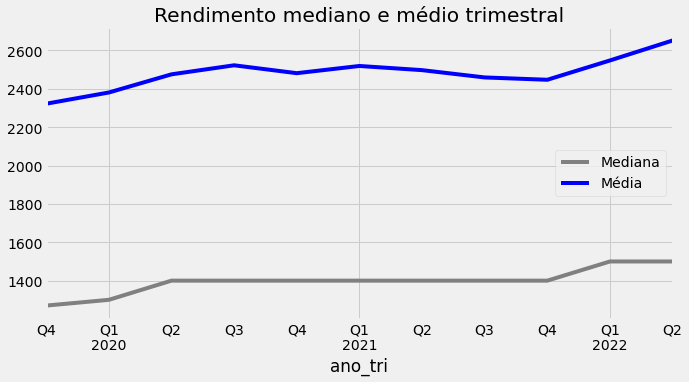

In [17]:
pd.concat([rendimento_mediano_trimestre, rendimento_medio_trimestre], axis=1).plot(kind='line', figsize=(10,5), title='Rendimento mediano e médio trimestral', color=['gray', 'blue'])

In [18]:
pnadc_completa['VD4019'].agg(['min', 'max', 'mean', 'median', 'std'])

min            2.000000
max       320000.000000
mean        2241.818464
median      1400.000000
std         3461.620751
Name: VD4019, dtype: float64

In [19]:
#amplitude
pnadc_completa['VD4019'].max() - pnadc_completa['VD4019'].min()

319998.0

In [20]:
pnadc_completa[pd.notnull(pnadc_completa['VD4019'])]

,Ano,Trimestre,UPA,UF,Capital,V2007,ID,VD4019,V1027,V1028,V1029,V1033,posest,posest_sxi,ano_tri
0,2019,4,110000016,Rondônia,Município de Porto Velho (RO),Mulher,110002003,2100.0,98.756636,145.628790,532471,6982307,111,210,2019Q4
5,2019,4,110000016,Rondônia,Município de Porto Velho (RO),Mulher,110002020,1000.0,98.756636,134.017538,532471,6507966,111,211,2019Q4
9,2019,4,110000016,Rondônia,Município de Porto Velho (RO),Homem,110002036,2500.0,98.756636,196.307658,532471,8704572,111,105,2019Q4
10,2019,4,110000016,Rondônia,Município de Porto Velho (RO),Mulher,110002035,1000.0,98.756636,196.307658,532471,8527747,111,205,2019Q4
13,2019,4,110000016,Rondônia,Município de Porto Velho (RO),Homem,110002030,1600.0,98.756636,171.003355,532471,8515949,111,107,2019Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482111,2022,2,530057544,Distrito Federal,Município de Brasília (DF),Mulher,530059581,1700.0,54.952666,53.693757,3125014,8692027,531,208,2022Q2
482112,2022,2,530057544,Distrito Federal,Município de Brasília (DF),Mulher,530059572,600.0,54.952666,81.626590,3125014,8558427,531,207,2022Q2
482113,2022,2,530057544,Distrito Federal,Município de Brasília (DF),Homem,530059585,600.0,54.952666,81.626590,3125014,8442398,531,107,2022Q2
482114,2022,2,530057544,Distrito Federal,Município de Brasília (DF),Homem,530059543,1500.0,54.952666,72.323502,3125014,3560554,531,114,2022Q2


In [21]:
(pnad_2022_2[pd.notnull(pnad_2022_2['VD4019'])]['VD4019'] * pnad_2022_2[pd.notnull(pnad_2022_2['VD4019'])]['V1028'])

0         219132.769906
1         217578.636786
2         188360.934132
8         128573.107325
10        159529.432192
              ...      
482111     91279.386832
482112     48975.953736
482113     48975.953736
482114    108485.252265
482115    108485.252265
Length: 200195, dtype: float64

In [22]:
pnadc_completa.pivot_table(index='ano_tri',values='VD4019', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
ano_tri,,,,,,,,
2019Q4,998.0,1270.0,2000.0,223176.0,300000.0,2080.875654,5.0,3245.542272
2020Q1,1000.0,1300.0,2100.0,196786.0,250000.0,2126.890749,4.0,3232.168131
2020Q2,1000.0,1400.0,2500.0,136743.0,320000.0,2293.826134,10.0,3519.756087
2020Q3,1000.0,1400.0,2400.0,132967.0,320000.0,2272.299119,10.0,3595.121000
2020Q4,1000.0,1400.0,2400.0,126494.0,150100.0,2247.702737,10.0,3347.362015
2021Q1,1000.0,1400.0,2400.0,119802.0,300000.0,2260.820395,10.0,3572.493534
2021Q2,1000.0,1400.0,2300.0,136620.0,300000.0,2244.951771,6.0,3547.075762
2021Q3,1000.0,1400.0,2225.0,172588.0,300000.0,2203.422926,2.0,3478.592989
2021Q4,1000.0,1400.0,2300.0,187182.0,250000.0,2226.491174,2.0,3403.058596
